La idea de este informe es analizar las distintas variables que hacen a la calidad de vida, detectar si alguna de esas variables son dependientes y, finalmente, identificar los países con mejor calidad de vida.

IMPORTACIÓN DE LIBRERÍAS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

ACCESO AL DATASET A TRAVÉS DE API DE KAGGLE

In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("ahmedmohamed2003/quality-of-life-for-each-country")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'Quality_of_Life.csv')

# Chequear si el archivo existe e imprimir primeras cinco entradas
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print(f"Error: File not found at {file_path}")

Path to dataset files: /kaggle/input/quality-of-life-for-each-country
         country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Moderate'   

   Climate Value Climate Category  Cost of Living Value  \

EXPLORACIÓN ANALÍTICA DE DATOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            236 non-null    object 
 1   Purchasing Power Value             236 non-null    float64
 2   Purchasing Power Category          190 non-null    object 
 3   Safety Value                       236 non-null    float64
 4   Safety Category                    234 non-null    object 
 5   Health Care Value                  236 non-null    float64
 6   Health Care Category               221 non-null    object 
 7   Climate Value                      236 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living Value               236 non-null    float64
 10  Cost of Living Category            191 non-null    object 
 11  Property Price to Income Value     236 non-null    object 

VALORES NULOS

<Axes: >

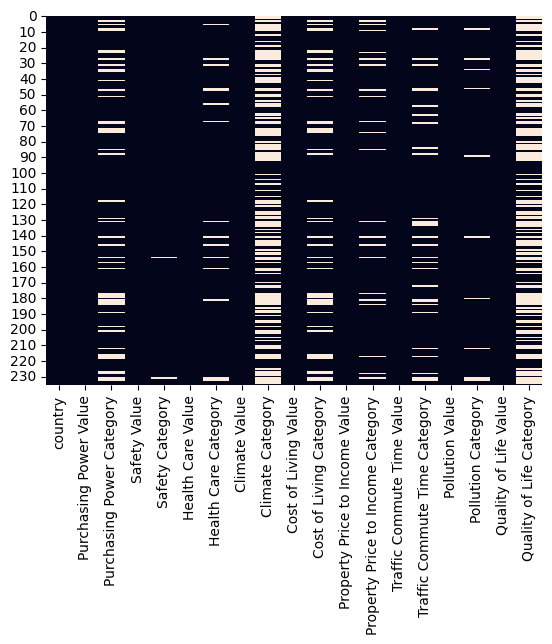

In [ ]:
valores_nulos = df.isnull()

# se imprime la suma de valores nulos de cada columna
df.isnull().sum()

# se grafica con un mapa de calor de seaborn
sns.heatmap(df.isnull(), cbar=False)

Se ve que la mayoría de los países no tienen clasificación climática ni de calidad de vida, por lo que no vamos a tener en cuenta dichas columnas para el análisis.

A su vez, queremos llegar a una conclusión propia basada en los diferentes items, por lo que también dejaremos de lado el valor de calidad de vida.

In [ ]:
database = df.drop(columns=['Climate Category', 'Quality of Life Value', 'Quality of Life Category'])
#se imprimen los treinta primeros registros como prueba de la eliminación de las columnas
database.head(30)

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High'
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low'
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low'
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High'
5,American Samoa,0.00,NaN,54.41,'Moderate',0.00,NaN,0.00,0.00,NaN,0.0,NaN,100.00,'Very High',78.45,'High'
6,Andorra,121.14,'Very High',84.71,'Very High',75.56,'High',0.00,48.09,'Low',9.03,'Moderate',13.33,'Very Low',22.98,'Low'
7,Angola,224.46,'Very High',33.71,'Low',36.58,'Low',0.00,42.57,'Low',8.01,'Moderate',65.43,'Very High',92.07,'Very High'
8,Anguilla,0.00,NaN,75.44,'High',77.08,'High',0.00,0.00,NaN,1.8399999999999999,'Very Low',0.00,NaN,0.00,NaN
9,Antigua And Barbuda,0.00,NaN,42.86,'Moderate',30.56,'Low',0.00,0.00,NaN,0.0,NaN,35.00,'Moderate',43.10,'Moderate'


Con esto, notamos que un gran porcentaje de los países no tienen información de valores climáticos (están en 0.00), pero por ahora dejaremos la columna al ser un importante indicador en nuestra búsqueda.

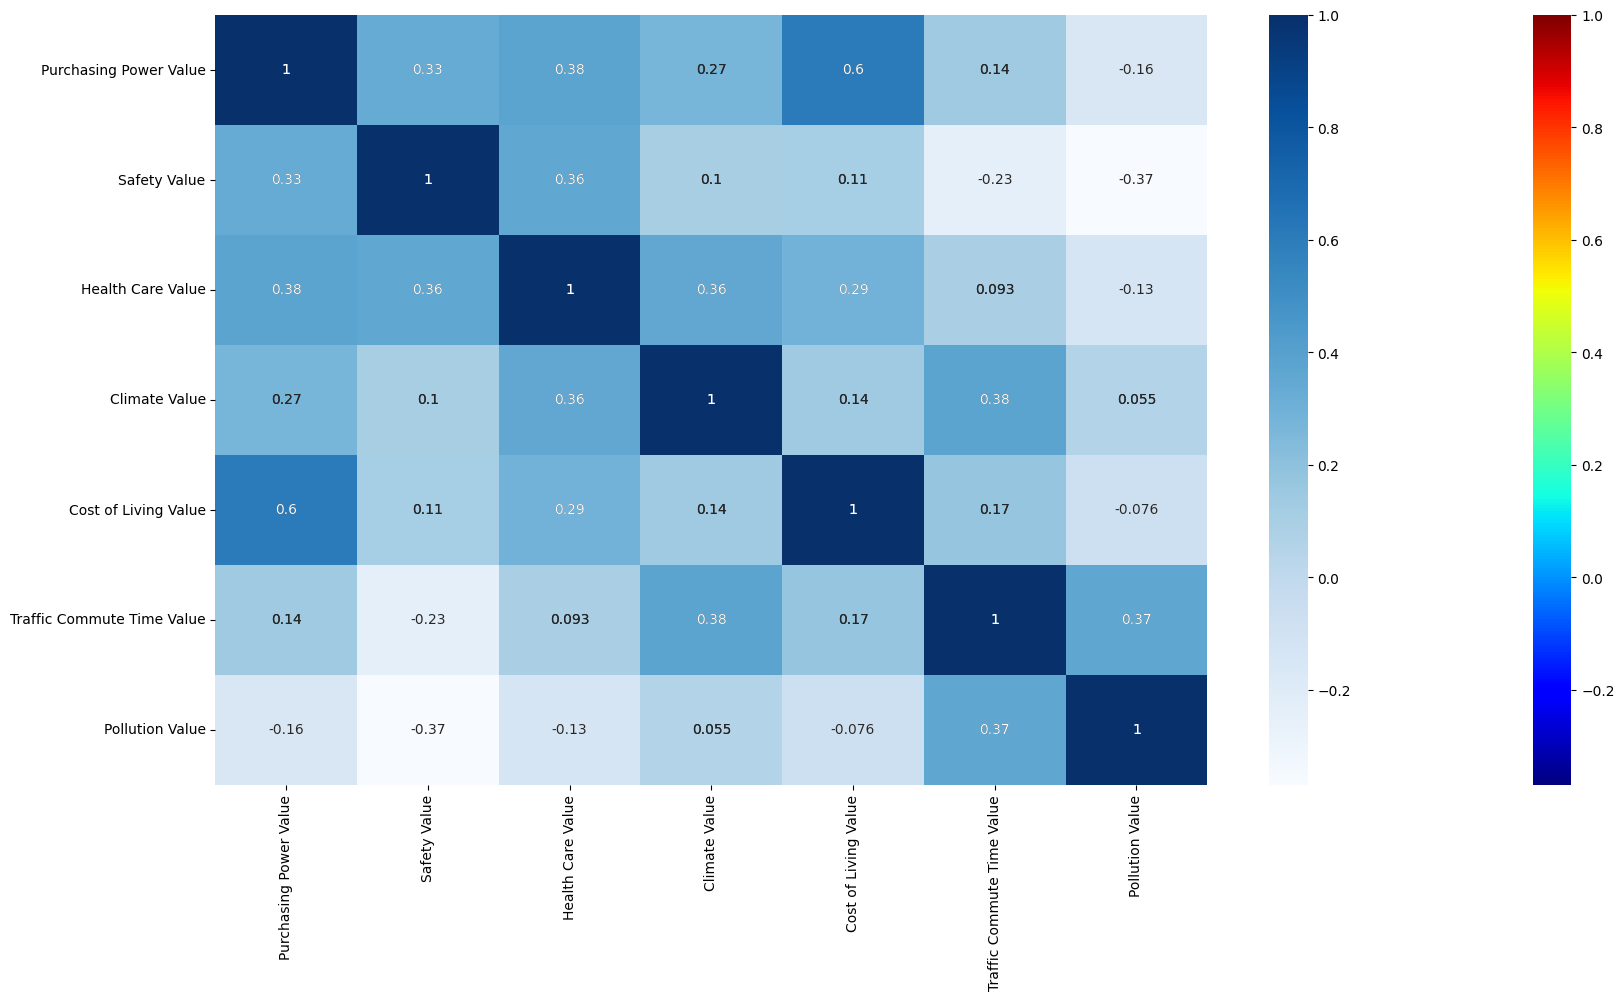

In [ ]:
plt.figure(figsize=(20, 10))
life_corr = database.corr(numeric_only=True)
sns.heatmap(life_corr,
            xticklabels = life_corr.columns.values,
            yticklabels = life_corr.columns.values,
            annot = True,cmap='jet');
corr = database.corr(numeric_only=True)
chart = sns.heatmap(corr, annot = True, cmap='Blues')

Aquí vemos que las variables más relacionadas son el coste de vida ('Cost of Living Value') y el poder adquisitivo ('Purchasing Power Value'), por lo que procederemos a hacer un análisis bivariado de las mismas.

Coefficients: 
 [1.20799556]
Independent term: 
 10.241684975338572
Mean squared error: 1709.11
Variance score: 0.37


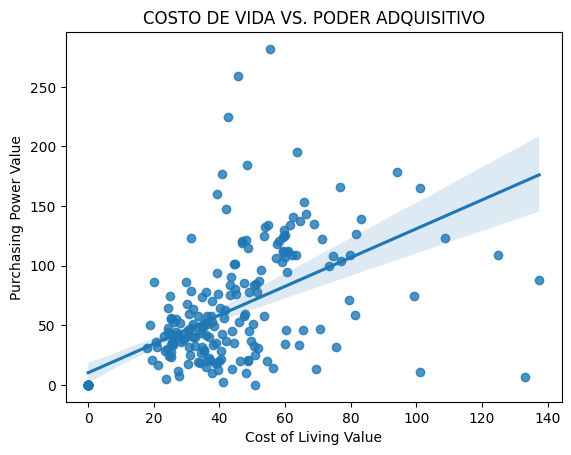

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#se utilizará un modelo de regresión lineal y un diagrama de dispersión (scatter plot)

X_train = database[['Cost of Living Value']]
y_train = database['Purchasing Power Value'].values

regr = linear_model.LinearRegression()

modelo= regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)


print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


sns.regplot(x=database['Cost of Living Value'], y=database['Purchasing Power Value'])
plt.title('COSTO DE VIDA VS. PODER ADQUISITIVO')
plt.savefig('costo_de_vida_vs_poder_adquisitivo.png', transparent=True)
plt.show()

Observamos que el costo de vida y el poder adquisitivo son concordantes en los países en los que ambos índices son bajos. Luego, las variables se dispersan más entre sí.

**Paises con alto nivel de seguridad, alto poder adquisitivo y buen sistema de salud**

In [ ]:
#calculamos la media de las variables de seguridad 'Safety Value' y del sistema de salud 'Health Care Value'
print(database['Safety Value'].mean())
print(database['Health Care Value'].mean())



55.274449152542374
54.73156779661018


In [ ]:
#filtramos el dataset por los países que superen la media de las variables que calculamos antes, que sean de muy alto poder adquisitivo ('Purchasing Power Category -> Very High') y las ordenamos por el coste de vida ('Cost of Living Value') en forma ascendente
db_filtrada = database[(database['Purchasing Power Category'].str.contains('Very High', na=False)) & (database['Safety Value'] > 55.274449152542374) & (database['Health Care Value'] > 54.73156779661018) ]
print(db_filtrada[['country','Safety Value','Health Care Value','Cost of Living Value']].sort_values(by='Cost of Living Value', ascending=True))

                  country  Safety Value  Health Care Value  \
159                  Oman         81.94              65.11   
113                Kuwait         67.19              57.93   
185          Saudi Arabia         76.23              61.71   
32                 Brunei         70.70              75.37   
106                 Japan         77.07              79.81   
6                 Andorra         84.71              75.56   
171                 Qatar         84.05              73.45   
17                Bahrain         75.28              66.60   
1           Aland Islands         71.81              79.72   
221  United Arab Emirates         84.43              70.63   
111              Kiribati         81.86              55.56   
84             Guadeloupe         72.18              93.06   
78                Germany         60.77              71.97   
70                Finland         73.57              77.57   
148           Netherlands         73.36              79.47   
101     

Llegamos a la conclusión de que estos 24 países o territorios cumplen con los filtros que seleccionamos, siendo los que tienen un mejor balance en costo de vida, seguridad y sistema de salud.

**PAÍSES MÁS SEGUROS**

In [ ]:
db_seguros = db_filtrada.nlargest(n=5, columns=['Safety Value'])[['country', 'Safety Value']]

print(db_seguros)


                  country  Safety Value
121         Liechtenstein         87.84
6                 Andorra         84.71
221  United Arab Emirates         84.43
171                 Qatar         84.05
159                  Oman         81.94


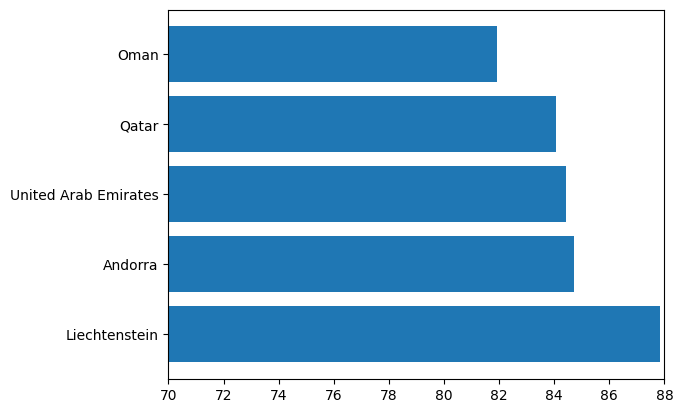

In [ ]:
import matplotlib.pyplot as plt

x = db_seguros['Safety Value'].tolist()
y = db_seguros['country'].tolist()

fig, ax = plt.subplots()
ax.barh(y, x)
plt.xlim(70, 88)
plt.show()


**PAÍSES CON MEJOR ATENCIÓN MÉDICA**

In [ ]:
db_salud = db_filtrada.nlargest(n=5, columns=['Health Care Value'])[['country', 'Health Care Value']]

print(db_salud)


           country  Health Care Value
84      Guadeloupe              93.06
106          Japan              79.81
1    Aland Islands              79.72
148    Netherlands              79.47
55         Denmark              78.50


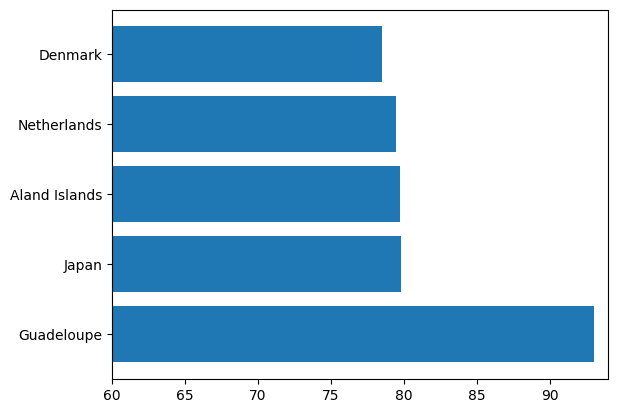

In [ ]:
import matplotlib.pyplot as plt

x = db_salud['Health Care Value'].tolist()
y = db_salud['country'].tolist()

fig, ax = plt.subplots()
ax.barh(y, x)
plt.xlim(60, 94)
plt.show()

**PAÍSES CON MENOR COSTO DE VIDA**

In [ ]:
db_filtrada.nsmallest(n=5, columns=['Cost of Living Value'])[['country', 'Cost of Living Value']]


,country,Cost of Living Value
159,Oman,39.30
113,Kuwait,40.82
185,Saudi Arabia,42.06
32,Brunei,46.73
106,Japan,46.99


**PAÍSES CON MENOR ÍNDICE DE POLUCIÓN**

In [ ]:
db_filtrada.nsmallest(n=5, columns=['Pollution Value'])[['country', 'Pollution Value']]


,country,Pollution Value
121,Liechtenstein,6.47
87,Guernsey,11.49
70,Finland,11.83
95,Iceland,15.84
1,Aland Islands,18.05


**PAÍSES CON MEJOR RELACIÓN PRECIO DE VIVIENDA Y SALARIO**

In [ ]:
db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')
db_filtrada.nsmallest(n=6, columns=['Property Price to Income Value'])[['country', 'Property Price to Income Value']]

/tmp/ipython-input-60-2554806085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')


,country,Property Price to Income Value
111,Kiribati,0.00
159,Oman,2.81
185,Saudi Arabia,3.09
101,Isle Of Man,3.63
17,Bahrain,4.90
171,Qatar,5.06


Al figurar en 0.00 Kiribati, lo eliminamos ya que no nos sirve para nuestro análisis. También descartaremos la Isla de Man al no ser un territorio independiente.

In [ ]:
db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')
db_drop = db_filtrada.nsmallest(n=7, columns=['Property Price to Income Value'])[['country', 'Property Price to Income Value']]

db_drop = db_drop.drop(index=[111, 101])

print(db_drop)


           country  Property Price to Income Value
159           Oman                            2.81
185   Saudi Arabia                            3.09
17         Bahrain                            4.90
171          Qatar                            5.06
121  Liechtenstein                            5.07


/tmp/ipython-input-61-1075142016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_filtrada['Property Price to Income Value'] = pd.to_numeric(db_filtrada['Property Price to Income Value'], errors='coerce')


Así, llegamos a los cinco países con mejor relación entre el costo de vivienda y el salario

**PAISES CON MEJOR RELACIÓN ENTRE SEGURIDAD, ATENCIÓN MÉDICA Y PODER ADQUISITIVO**


In [ ]:
db_samp = database['Safety Value'] + database['Health Care Value'] + database['Purchasing Power Value']

mean = db_samp.mean

result = database.loc[db_samp.nlargest(n=5).index, ['country']]
print(result)


           country
111       Kiribati
210    Timor-Leste
171          Qatar
121  Liechtenstein
123     Luxembourg


**PAISES CON MEJOR RELACIÓN ENTRE COSTO DE VIDA Y COSTO DE VIVIENDA**


In [ ]:
db_CV = database['Cost of Living Value'].astype(float) + database['Property Price to Income Value'].str.replace("'", "").str.replace(',', '').astype(float)

mean = db_samp.mean

result = database.loc[db_samp.nsmallest(n=5).index, ['country']]

print(result)

               country
154               Niue
231  Wallis And Futuna
198        South Sudan
146              Nauru
5       American Samoa


**PREDICCIÓN CLIMÁTICA**

La idea de este bloque es identificar y generar el esqueleto de un predictor climático, para luego desarrollar un selector para Tableau o PowerBI en el que, eligiendo la ciudad, grafique una predicción de temperatura.

In [ ]:
import kagglehub
import os

# Descarga del dataset mediante API de kaggle
path2 = kagglehub.dataset_download("bwandowando/capital-cities-of-the-world-weather-data")

print("Path to dataset files:", path2)
file_path2 = os.path.join(path2, 'cities.csv')
# Chequear si el archivo existe e imprimir primeras cinco entradas
if os.path.exists(file_path2):
    df = pd.read_csv(file_path2)
    print(df.head())
else:
    print(f"Error: File not found at {file_path2}")



Path to dataset files: /kaggle/input/capital-cities-of-the-world-weather-data
     country_name              city_name  latitude  longitude
0     Afghanistan                  Kabul   34.5289    69.1725
1         Albania        Tiranë (Tirana)   41.3275    19.8189
2         Algeria  El Djazaïr  (Algiers)   36.7525     3.0420
3  American Samoa              Pago Pago  -14.2781  -170.7025
4         Andorra       Andorra la Vella   42.5078     1.5211


In [ ]:
import pyarrow.parquet as pq
import pandas as pd

# Elegimos la tabla de datos diarios dentro del dataset
print("Path to dataset files:", path2)
file_path2 = os.path.join(path2, 'daily_data.parquet')

# Chequear si el archivo existe y leer el archivo Parquet
if os.path.exists(file_path2):
    # Lectura del archivo Parquet usando pyarrow
    clima = pd.read_parquet(file_path2)

    print(clima.head())
else:
    print(f"Error: Archivo no encontrado en {file_path2}")


Path to dataset files: /kaggle/input/capital-cities-of-the-world-weather-data
  city_name   datetime  weather_code  temperature_2m_max  temperature_2m_min  \
0   Abidjan 1950-01-01          55.0                29.2                24.1   
1   Abidjan 1950-01-02          61.0                27.8                25.5   
2   Abidjan 1950-01-03          51.0                27.8                24.0   
3   Abidjan 1950-01-04          53.0                28.5                24.1   
4   Abidjan 1950-01-05          63.0                27.4                23.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.5                      34.6                      28.6   
1                 26.2                      32.8                      30.0   
2                 25.7                      33.4                      28.7   
3                 26.1                      34.5                      28.5   
4                 25.4                      32.4   

In [ ]:
import numpy as np
import pandas as pd

# Elegimos una ciudad como ejemplo
city_name = 'Buenos Aires'

print(clima[clima['city_name'] == city_name])


            city_name   datetime  weather_code  temperature_2m_max  \
1103158  Buenos Aires 1950-01-01          51.0                30.0   
1103159  Buenos Aires 1950-01-02           1.0                25.3   
1103160  Buenos Aires 1950-01-03           3.0                30.1   
1103161  Buenos Aires 1950-01-04           3.0                26.6   
1103162  Buenos Aires 1950-01-05          51.0                21.4   
...               ...        ...           ...                 ...   
1127008  Buenos Aires 2025-04-20           3.0                18.0   
1127009  Buenos Aires 2025-04-21           3.0                17.9   
1127010  Buenos Aires 2025-04-22           3.0                21.1   
1127011  Buenos Aires 2025-04-23           3.0                24.4   
1127012  Buenos Aires 2025-04-24           3.0                20.8   

         temperature_2m_min  temperature_2m_mean  apparent_temperature_max  \
1103158                19.8                 24.0                      30.6   
110

In [ ]:
# Descargamos modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

clima_db = clima [clima['city_name'] == 'Buenos Aires']
clima_db

,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,year
1103158,Buenos Aires,1950-01-01,51.0,30.0,19.8,24.0,30.6,17.4,23.1,1950-01-01T08:44,...,0.2,0.2,0.0,2.0,35.5,58.0,62.0,30.77,7.25,1950
1103159,Buenos Aires,1950-01-02,1.0,25.3,18.3,21.0,26.3,15.0,19.3,1950-01-02T08:44,...,0.0,0.0,0.0,0.0,33.0,55.1,109.0,32.36,7.10,1950
1103160,Buenos Aires,1950-01-03,3.0,30.1,19.3,24.1,32.8,15.8,23.4,1950-01-03T08:45,...,0.0,0.0,0.0,0.0,34.0,55.1,82.0,31.39,7.75,1950
1103161,Buenos Aires,1950-01-04,3.0,26.6,16.3,20.4,25.8,14.3,19.7,1950-01-04T08:46,...,0.0,0.0,0.0,0.0,27.9,45.7,103.0,28.78,4.94,1950
1103162,Buenos Aires,1950-01-05,51.0,21.4,14.4,17.3,20.3,11.4,14.8,1950-01-05T08:46,...,0.1,0.1,0.0,1.0,27.4,42.1,95.0,29.63,5.76,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127008,Buenos Aires,2025-04-20,3.0,18.0,10.1,13.8,17.0,8.4,12.7,2025-04-20T10:21,...,0.0,0.0,0.0,0.0,8.7,17.6,195.0,15.34,2.36,2025
1127009,Buenos Aires,2025-04-21,3.0,17.9,10.7,14.9,17.6,9.7,14.2,2025-04-21T10:22,...,0.0,0.0,0.0,0.0,8.5,24.5,27.0,14.35,2.24,2025
1127010,Buenos Aires,2025-04-22,3.0,21.1,15.7,18.3,22.3,15.4,18.7,2025-04-22T10:22,...,0.0,0.0,0.0,0.0,11.7,24.8,15.0,14.10,2.49,2025
1127011,Buenos Aires,2025-04-23,3.0,24.4,17.2,20.1,25.2,17.1,20.6,2025-04-23T10:23,...,0.0,0.0,0.0,0.0,11.7,26.6,322.0,11.67,2.39,2025


Vemos en el print que hay datos en NaN, chequeamos la cantidad en cada columna


In [ ]:
print(clima_db.isnull().sum())

city_name                      0
datetime                       0
weather_code                   0
temperature_2m_max             0
temperature_2m_min             0
temperature_2m_mean            1
apparent_temperature_max       0
apparent_temperature_min       0
apparent_temperature_mean      1
sunrise                        0
sunset                         0
daylight_duration              0
sunshine_duration              1
precipitation_sum              1
rain_sum                       1
snowfall_sum                   1
precipitation_hours            0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    1
shortwave_radiation_sum        1
et0_fao_evapotranspiration     1
year                           0
dtype: int64


Vemos que sólo figuran en la última entrada, que pertenece al último día de datos, por lo que, en el tamaño del dataset, lo descartamos por poco significativo para el análisis.

In [ ]:
# eliminación de entradas sin datos (NaN)
clima_db.dropna(inplace=True)
clima_db

/tmp/ipython-input-69-1512910304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clima_db.dropna(inplace=True)


,city_name,datetime,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,year
1103158,Buenos Aires,1950-01-01,51.0,30.0,19.8,24.0,30.6,17.4,23.1,1950-01-01T08:44,...,0.2,0.2,0.0,2.0,35.5,58.0,62.0,30.77,7.25,1950
1103159,Buenos Aires,1950-01-02,1.0,25.3,18.3,21.0,26.3,15.0,19.3,1950-01-02T08:44,...,0.0,0.0,0.0,0.0,33.0,55.1,109.0,32.36,7.10,1950
1103160,Buenos Aires,1950-01-03,3.0,30.1,19.3,24.1,32.8,15.8,23.4,1950-01-03T08:45,...,0.0,0.0,0.0,0.0,34.0,55.1,82.0,31.39,7.75,1950
1103161,Buenos Aires,1950-01-04,3.0,26.6,16.3,20.4,25.8,14.3,19.7,1950-01-04T08:46,...,0.0,0.0,0.0,0.0,27.9,45.7,103.0,28.78,4.94,1950
1103162,Buenos Aires,1950-01-05,51.0,21.4,14.4,17.3,20.3,11.4,14.8,1950-01-05T08:46,...,0.1,0.1,0.0,1.0,27.4,42.1,95.0,29.63,5.76,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127007,Buenos Aires,2025-04-19,3.0,18.2,9.5,13.8,16.9,6.6,11.8,2025-04-19T10:20,...,0.0,0.0,0.0,0.0,12.7,28.8,213.0,16.62,2.88,2025
1127008,Buenos Aires,2025-04-20,3.0,18.0,10.1,13.8,17.0,8.4,12.7,2025-04-20T10:21,...,0.0,0.0,0.0,0.0,8.7,17.6,195.0,15.34,2.36,2025
1127009,Buenos Aires,2025-04-21,3.0,17.9,10.7,14.9,17.6,9.7,14.2,2025-04-21T10:22,...,0.0,0.0,0.0,0.0,8.5,24.5,27.0,14.35,2.24,2025
1127010,Buenos Aires,2025-04-22,3.0,21.1,15.7,18.3,22.3,15.4,18.7,2025-04-22T10:22,...,0.0,0.0,0.0,0.0,11.7,24.8,15.0,14.10,2.49,2025


**ENTRENAMIENTO DE MODELOS**

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 0.9999985993681153
MSE: 4.1266871594247806e-05


Tenemos un R squared de virtualmente 1, casi perfecto. Sin embargo el MSE nos marca una tasa de error de alrededor de 2° (raíz del número generado) , lo que puede ser significativo para el análisis.

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 0.9999466882212713
MSE: 0.0015707270063409966


Otra vez el r squared roza el 1. En este caso, el MSE nos da un margen de error apenas superior a los 0 grados. Este modelo es muy bueno para lo que estamos buscando.

Regresión Lineal

In [ ]:
clima_db.dropna(inplace=True)

x = clima_db.drop(['city_name', 'datetime', 'sunrise', 'sunset', 'year'], axis=1)
y = clima_db['temperature_2m_mean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

/tmp/ipython-input-70-3990021034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clima_db.dropna(inplace=True)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R^2: {r2}")
print(f"MSE: {mse}")

R^2: 1.0
MSE: 2.3132157022689438e-27


Aquí el r squared es 1, perfecto. Significa que este modelo es el que mejor marca la tendencia, aunque tiene un margen de error de alrededor de 1.5 grados.

**OPTIMIZACIÓN Y GRÁFICOS**

Best parameters found by RandomizedSearchCV:
{'max_depth': 9, 'min_samples_leaf': 7, 'min_samples_split': 19, 'n_estimators': 181}

Optimized Gradient Boosting Regressor Evaluation on Test Set:
  R^2: 1.0000
  MSE: 0.0001


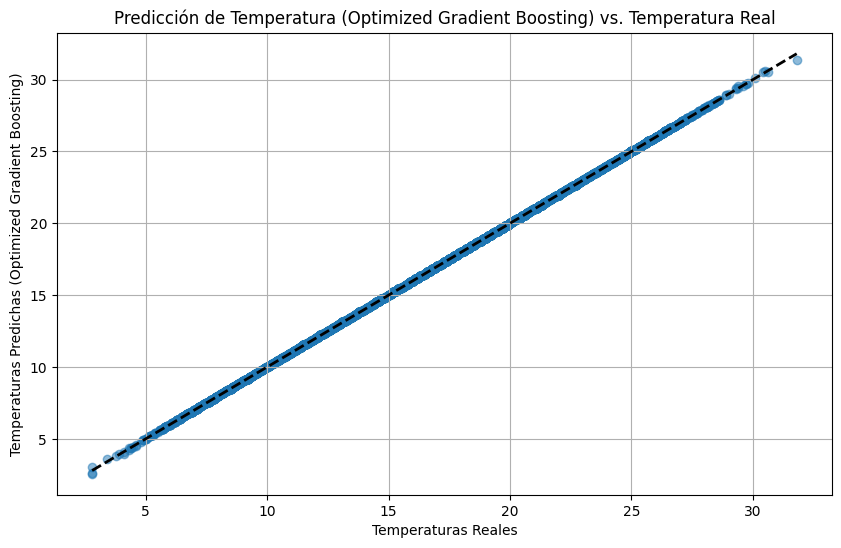

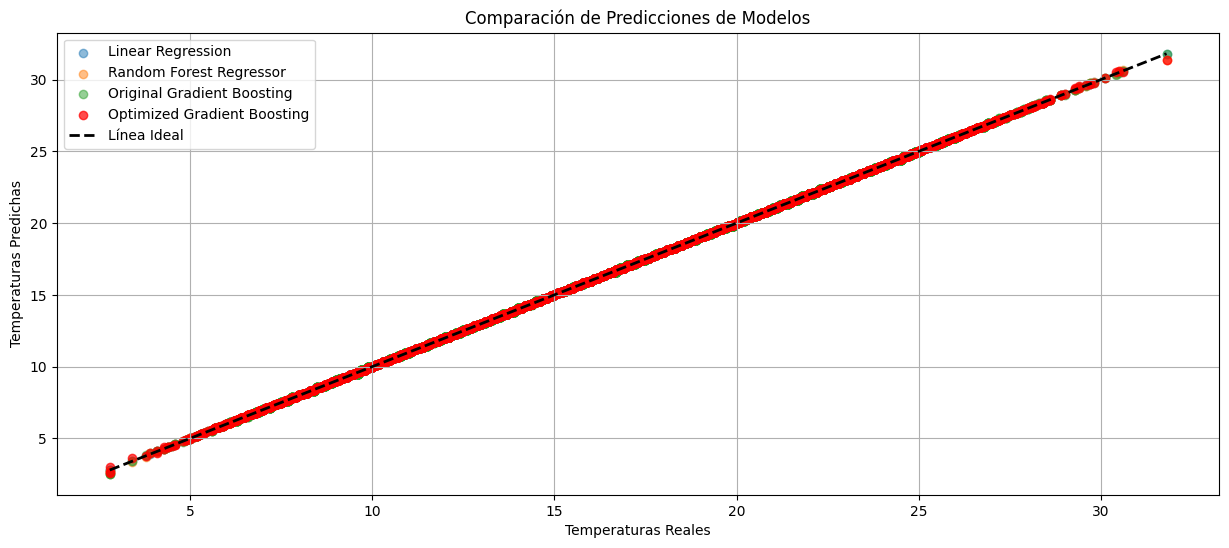

In [ ]:
# Optimizamos el modelo con Randomized Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import numpy as np

# Definimos los parámetros
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': randint(1, 20),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 20)}

# Usamos Gradient Boosting por su menor margen de error
random_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                   scoring='neg_mean_squared_error',
                                   random_state=42,
                                   n_jobs=-1)


random_search.fit(x_train, y_train)

best_gb_model = random_search.best_estimator_

print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Evaluamos el mejor modelo
y_pred_optimized = best_gb_model.predict(x_test)
r2_optimized = r2_score(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)

print(f"\nOptimized Gradient Boosting Regressor Evaluation on Test Set:")
print(f"  R^2: {r2_optimized:.4f}")
print(f"  MSE: {mse_optimized:.4f}")

# Graficamos predicción vs temperatura real para el modelo optimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.5)
plt.xlabel("Temperaturas Reales")
plt.ylabel("Temperaturas Predichas (Optimized Gradient Boosting)")
plt.title("Predicción de Temperatura (Optimized Gradient Boosting) vs. Temperatura Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de referencia ideal
plt.grid(True)
plt.show()

# Graficamos también las diferencias entre los tres modelos
plt.figure(figsize=(15, 6))

# Regresión lineal
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest Regressor')


# Gradient Boosting original, sin optimizar
gb_model_orig = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_orig.fit(x_train, y_train)
y_pred_gbr_orig = gb_model_orig.predict(x_test)
plt.scatter(y_test, y_pred_gbr_orig, alpha=0.5, label='Original Gradient Boosting')


# Gradient Boosting optimizado con Randomized Search
plt.scatter(y_test, y_pred_optimized, alpha=0.7, color='red', label='Optimized Gradient Boosting')

plt.xlabel("Temperaturas Reales")
plt.ylabel("Temperaturas Predichas")
plt.title("Comparación de Predicciones de Modelos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal') # Línea de referencia ideal
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Validamos los modelos con kfold

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Definimos número de splits
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

#
lr_r2_scores = []
lr_mse_scores = []
rf_r2_scores = []
rf_mse_scores = []
gb_r2_scores = []
gb_mse_scores = []

# Aplicamos Kfold
for train_index, test_index in kf.split(x):
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Linear Regression
  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)
  y_pred_lr = lr_model.predict(X_test)
  lr_r2 = r2_score(y_test, y_pred_lr)
  lr_mse = mean_squared_error(y_test, y_pred_lr)
  lr_r2_scores.append(lr_r2)
  lr_mse_scores.append(lr_mse)

  # Random Forest Regressor
  rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_model.fit(X_train, y_train)
  y_pred_rf = rf_model.predict(X_test)
  rf_r2 = r2_score(y_test, y_pred_rf)
  rf_mse = mean_squared_error(y_test, y_pred_rf)
  rf_r2_scores.append(rf_r2)
  rf_mse_scores.append(rf_mse)

  # Gradient Boosting Regressor
  gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
  gb_model.fit(X_train, y_train)
  y_pred_gb = gb_model.predict(X_test)
  gb_r2 = r2_score(y_test, y_pred_gb)
  gb_mse = mean_squared_error(y_test, y_pred_gb)
  gb_r2_scores.append(gb_r2)
  gb_mse_scores.append(gb_mse)

# Imprimimos los r squared y MSE promedio de cada modelo
print("\nKFold Cross-Validation Results:")
print("Linear Regression:")
print(f"  Average R^2: {np.mean(lr_r2_scores):.4f}")
print(f"  Average MSE: {np.mean(lr_mse_scores):.4f}")

print("\nRandom Forest Regressor:")
print(f"  Average R^2: {np.mean(rf_r2_scores):.4f}")
print(f"  Average MSE: {np.mean(rf_mse_scores):.4f}")

print("\nGradient Boosting Regressor:")
print(f"  Average R^2: {np.mean(gb_r2_scores):.4f}")
print(f"  Average MSE: {np.mean(gb_mse_scores):.4f}")



KFold Cross-Validation Results:
Linear Regression:
  Average R^2: 1.0000
  Average MSE: 0.0000

Random Forest Regressor:
  Average R^2: 1.0000
  Average MSE: 0.0001

Gradient Boosting Regressor:
  Average R^2: 0.9999
  Average MSE: 0.0016
